<a href="https://colab.research.google.com/github/asokraju/ml-grinding/blob/master/hands_on_ml/Ch_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Trees


##Notes



1.   Can be used for multilabel classification and Regression
2.   Model Interpretation
3. It can predict Propabilities




#Imports

In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pprint as pp

import os
import urllib
import tarfile
import urllib.request
from zipfile import ZipFile

import scipy
from scipy import stats

import sklearn
from sklearn import datasets

from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.datasets import fetch_openml
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
#from sklearn.externals import joblib

from sklearn.multiclass import OneVsOneClassifier

from sklearn.neighbors import KNeighborsClassifier

from pandas.plotting import scatter_matrix

np.random.seed(42)
random.seed(42)

In [ ]:
iris = datasets.load_iris()
X, y = iris['data'], iris['target']
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
print("test : ",len(X_test),"\ntrain : ",len(X_train))

test :  30 
train :  120


##DecisionTreeClassifier

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)
# y_pred = tree_clf.predict(X_test)
# accuracy = sum(y_pred == y_test)/len(y_test)
# print("accuracy: ", accuracy)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
def confusion_plot(X_test, y_test, clf):
    y_pred = clf.predict(X_test)
    accuracy = sum(y_pred == y_test)/len(y_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    print("accuracy: ", accuracy)
    print("Confusion Matrix: \n",conf_mat)
    row_sums = conf_mat.sum(axis=1, keepdims=True)
    norm_conf_mat = conf_mat / row_sums
    np.fill_diagonal(norm_conf_mat, 0)
    plt.matshow(norm_conf_mat, cmap=plt.cm.gray)
    plt.show()

accuracy:  0.9333333333333333
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


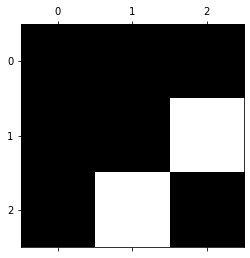

In [ ]:
confusion_plot(X_test, y_test, tree_clf)

In [ ]:
export_graphviz(
    tree_clf,
    out_file='/content/sample_data/iris_tree.dot',#image_path("iris_tree.dot"),
    #feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
    )
!dot -Tpng /content/sample_data/iris_tree.dot -o iris_tree.png

In [ ]:
!dot -Tpng /content/sample_data/iris_tree.dot -o iris_tree.png